<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/notebooks/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Regression

Modelo de classificação para **multiclasses**.

Pra cada classe $k$ existe um vetor de parâmetros $\theta_k$.

O **softmax score** de uma amostra $x$ é: $s_k = \theta_k^T * x$

A probabilidade de $x$ ser da classe $k$ é:
$$
\hat{p}_k = σ(s(x))_k = \frac{exp(s_k(x))}{∑^k_{j=1}exp(s_j(x))}
$$

A função de custo é a **entropia cruzada** (cross entropy)

$$
J(Θ) = \frac{-1}{m}∑^m_{i=1}∑^m_{i=1}y_k^{(i)}log(\hat{p}_k^{(i)})
$$

**Diferente de casos anteriores**, Θ é uma matriz.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import os

In [3]:
wineData = pd.read_csv('https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/winequality-red.csv')
wineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wineData.quality.unique() # 3-8

array([5, 6, 7, 4, 8, 3])

In [10]:
wineData.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [11]:
c = []
for q in wineData['quality'].values:
    if q < 6:
        c.append(0)
    elif q > 6:
        c.append(2)
    else:
        c.append(1)

wineData['category'] = c
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
X = wineData[wineData.columns[0:11]].values
y = wineData['category'].values

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [13]:
dataStan=pd.DataFrame(data = Xstan, columns = wineData.columns[0:11])
dataStan['category']=y
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


### Instânciando o modelo de verdade

In [14]:
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softReg.fit(Xstan,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [15]:
softReg.intercept_, softReg.coef_

(array([ 0.66431803,  0.71842416, -1.38274219]),
 array([[-0.24400928,  0.46198307,  0.11665908, -0.12252588,  0.21310007,
         -0.16517087,  0.44808912,  0.16405897,  0.02697928, -0.43345803,
         -0.74439786],
        [-0.08685965, -0.08273243, -0.15599758, -0.10287128,  0.07277259,
          0.07400143, -0.05628219,  0.16063616, -0.03937553, -0.03471461,
          0.09277181],
        [ 0.33086893, -0.37925063,  0.0393385 ,  0.22539716, -0.28587266,
          0.09116944, -0.39180693, -0.32469513,  0.01239625,  0.46817263,
          0.65162605]]))

In [16]:
yhat = softReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category,predict
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,0


In [17]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(dataStan['category'].values,yhat)
confusionMatrix = pd.DataFrame(data = C, index=['poor(0), true','good(1), true','great(2), true'], columns = ['poor(0), predicted','good(1), predicted','great(2), predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"poor(0), predicted","good(1), predicted","great(2), predicted",sum
"poor(0), true",580,156,8,744
"good(1), true",226,363,49,638
"great(2), true",14,125,78,217
sum,820,644,135,1599


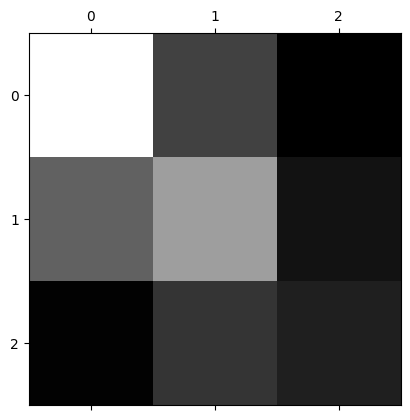

In [18]:
confMx = confusionMatrix.values[0:3,0:3]
plt.matshow(confMx, cmap=plt.cm.gray)
plt.show()

A matriz de confusão ideal deveria ter uma diagonal o + clara possível! (Predições corretas)

Não estão em proporção, vamos ajustar:

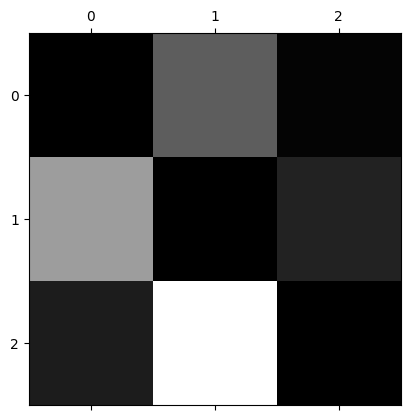

In [20]:
rowSums = confMx.sum(axis=1, keepdims=True) # contains number of samples for each true class
confMxNorm = confMx/rowSums

np.fill_diagonal(confMxNorm, 0)
plt.matshow(confMxNorm, cmap=plt.cm.gray)
plt.show()